In [17]:
import uproot
import hist
from hist import Hist
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
from scipy.optimize import curve_fit

In [18]:
f_mumu = uproot.open("/home/submit/jakedlee/FCCAnalyzer/output_h_bb.root")
print(f_mumu.keys())

['wzp6_ee_nunuH_Hbb_ecm240;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_p_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_theta_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_phi_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_q_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_no_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_p_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_theta_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_phi_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_q_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_no_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/cutFlow;1', 'wzp6_ee_nunuH_Hbb_ecm240/missingEnergy;1', 'wzp6_ee_nunuH_Hbb_ecm240/cosThetaMiss_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/mumu_recoil_m_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/ee_recoil_m_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/mumu_p_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/ee_p_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/acolinearity_mumu;1', 'wzp6_ee_nunuH_Hbb_ecm240/acolinearity_ee;1', 'wzp6_ee_nunuH_Hbb_ecm240/zmumu_m_nOne;1', 'wzp6_ee_nunuH_Hbb_e

The histograms are saved as `process_name/histogram_name`. We have two processes here corresponding to two different generators (Whizard and KKMC) that produces events of Z->mumu. Let's plot the cos(theta_c) distribution for both generators:

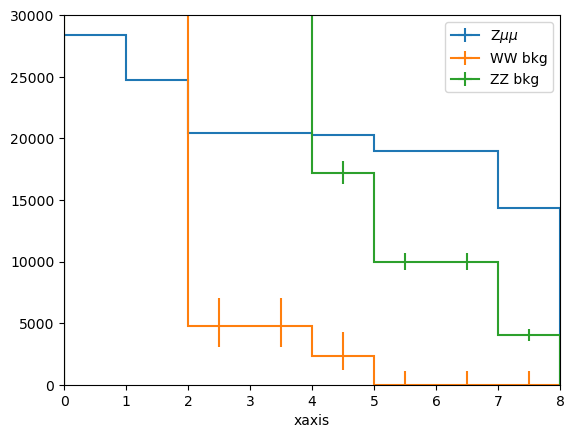

In [19]:
mumu =  f_mumu['wzp6_ee_mumuH_Hbb_ecm240/cutFlow'].to_hist()
WW   = f_mumu['p8_ee_WW_ecm240/cutFlow'].to_hist()
ZZ   = f_mumu['p8_ee_ZZ_ecm240/cutFlow'].to_hist()
hep.histplot([mumu, WW, ZZ], label=['Z$\mu\mu$', 'WW bkg', 'ZZ bkg'])#, stack=True)
plt.legend()
plt.xlim((0, 8))
plt.ylim((0, 30000))
#plt.yscale('log')
plt.show()

/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


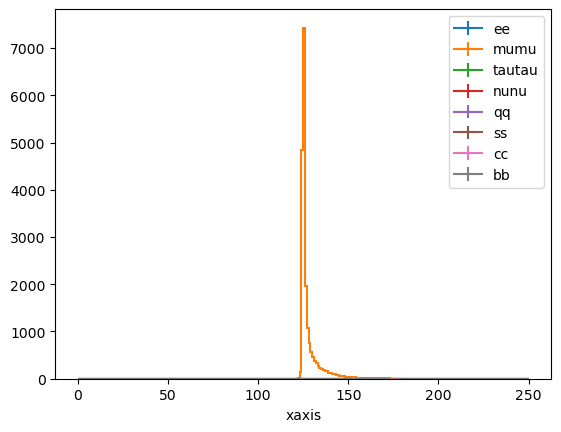

In [20]:
z_products = ['ee', 'mumu', 'tautau', 'nunu', 'qq', 'ss', 'cc', 'bb']

ZZ = f_mumu['p8_ee_ZZ_ecm240/mumu_recoil_m_nOne'].to_hist()
hists = [f_mumu[f'wzp6_ee_{i}H_Hbb_ecm240/mumu_recoil_m_nOne'].to_hist() for i in z_products]
#hists.append(ZZ)
#z_products.append('ZZ')
hep.histplot(hists, label=z_products)#, stack=True)
#plt.xlim(115,140)
plt.legend()
plt.show()

/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


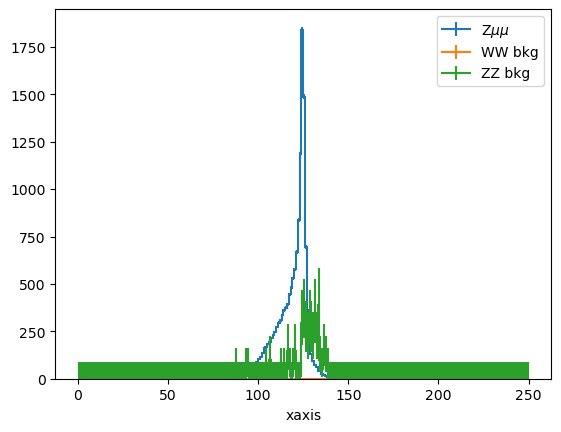

In [21]:
mumu =  f_mumu['wzp6_ee_mumuH_Hbb_ecm240/zmuons_m'].to_hist()
WW   = f_mumu['p8_ee_WW_ecm240/zmuons_m'].to_hist()
ZZ   = f_mumu['p8_ee_ZZ_ecm240/zmuons_m'].to_hist()
hep.histplot([mumu, WW, ZZ], label=['Z$\mu\mu$', 'WW bkg', 'ZZ bkg'])#, stack=True)
plt.legend()
plt.show()

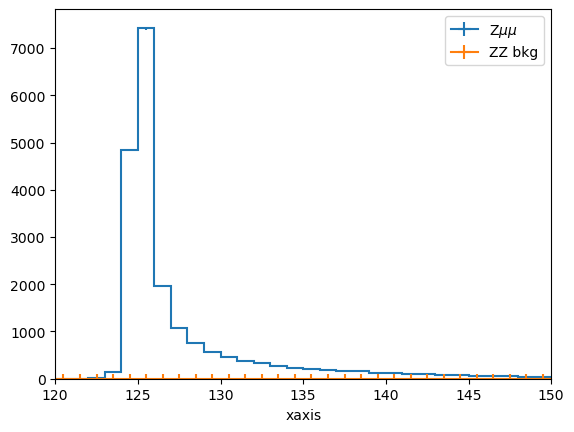

In [27]:
#zmumu_m_nOne
mumu =  f_mumu['wzp6_ee_mumuH_Hbb_ecm240/mumu_recoil_m_nOne'].to_hist()
#ee   =  f_mumu['wzp6_ee_eeH_Hbb_ecm240/muons_all_p_cut0'].to_hist()
#WW   = f_mumu['p8_ee_WW_ecm240/muons_all_p_cut0'].to_hist()
ZZ   = f_mumu['p8_ee_ZZ_ecm240/zmumu_m_nOne'].to_hist()
hep.histplot([mumu, ZZ], label=['Z$\mu\mu$', 'ZZ bkg'])
#hep.histplot(mumu, label='Z$\mu\mu$')
plt.legend()
plt.xlim((120,150))
#plt.ylim((0,50000))
#plt.yscale('log')
plt.show()

In [28]:
lumi = 7200000
A = f_mumu['wzp6_ee_mumuH_Hbb_ecm240/cutFlow'].to_hist()[2].value / f_mumu['wzp6_ee_mumuH_Hbb_ecm240/cutFlow'].to_hist()[0].value
E = f_mumu['wzp6_ee_mumuH_Hbb_ecm240/cutFlow'].to_hist()[7].value / f_mumu['wzp6_ee_mumuH_Hbb_ecm240/cutFlow'].to_hist()[2].value
Nsig = f_mumu['wzp6_ee_mumuH_Hbb_ecm240/zmuons_m'].to_hist().sum().value
Nbkg = f_mumu['p8_ee_ZZ_ecm240/zmuons_m'].to_hist().sum().value

print("Acceptance:", A, "\nEfficiency:", E, "\nNsig:", Nsig, "\nNbkg", Nbkg)
print("ee->ZH->mumubb Cross Section:", Nsig / (A*E*lumi))
print("Uncert:", 1/np.sqrt(Nsig + Nbkg) * 100, "%")

Acceptance: 0.7195550000000001 
Efficiency: 0.7036501726761678 
Nsig: 14363.143919999999 
Nbkg 4011.738479999999
ee->ZH->mumubb Cross Section: 0.00394
Uncert: 0.7377134742502123 %
